<a href="https://colab.research.google.com/github/Marciorochar/Analise-Preditiva/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Dados_Preparados_18.06.25.xlsx to Dados_Preparados_18.06.25 (3).xlsx
Amostra dos dados:


,Data,Ano,Mês,Dia,Dia_da_Semana_Segunda,Dia_da_Semana_Terça,Dia_da_Semana_Quarta,Dia_da_Semana_Quinta,Dia_da_Semana_Sexta,Final_de_Semana_Sábado,Final_de_Semana_Domingo,Feriado,Fim de Semana,Vendas
0,2022-01-01,2022,1,1,0,0,0,0,0,1,0,1,1,96
1,2022-01-02,2022,1,2,0,0,0,0,0,0,1,0,1,94
2,2022-01-03,2022,1,3,1,0,0,0,0,0,0,0,0,75
3,2022-01-04,2022,1,4,0,1,0,0,0,0,0,0,0,92
4,2022-01-05,2022,1,5,0,0,1,0,0,0,0,0,0,126


🔍 Erro Quadrático Médio (MSE): 631.24
📈 R² (coeficiente de determinação): 0.94


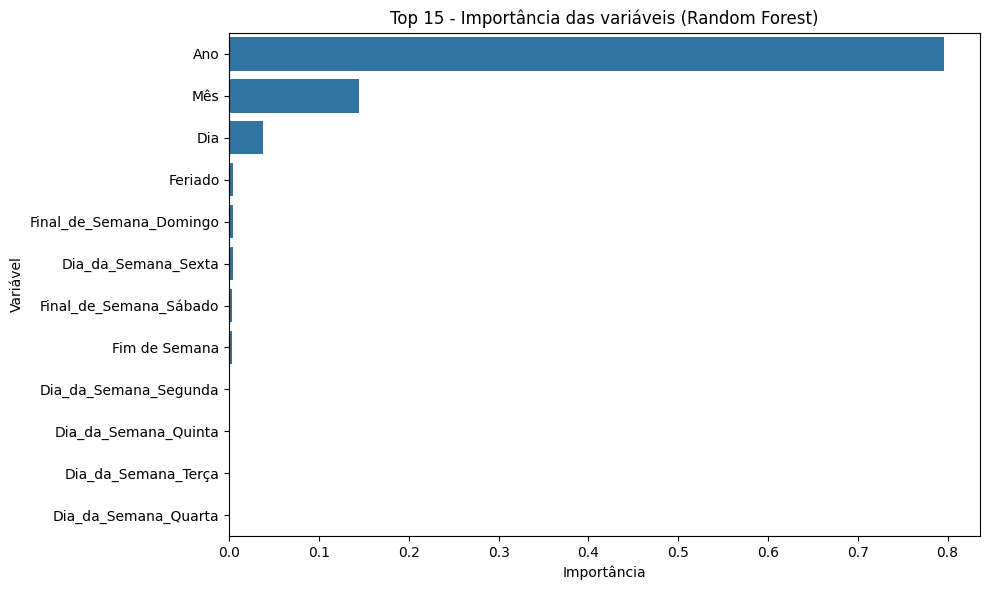

In [5]:
# 1. Upload do arquivo
from google.colab import files
uploaded = files.upload()

# 2. Importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 3. Leitura da planilha, aba correta
file_name = list(uploaded.keys())[0]  # Nome do arquivo enviado
df = pd.read_excel(file_name, sheet_name="One-Hot Encoding")

# 4. Visualizar os dados
print("Amostra dos dados:")
display(df.head())

# 5. Remover colunas não numéricas (como Data)
df = df.drop(columns=["Data"])  # remove a coluna de data (não numérica)

# 6. Separar X (features) e y (target: vendas)
X = df.drop(columns=["Vendas"])
y = df["Vendas"]

# 7. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 8. Treinar modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 9. Previsão e métricas
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"🔍 Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"📈 R² (coeficiente de determinação): {r2:.2f}")

# 10. Importância das variáveis
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values[:15], y=importances.index[:15])
plt.title('Top 15 - Importância das variáveis (Random Forest)')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()


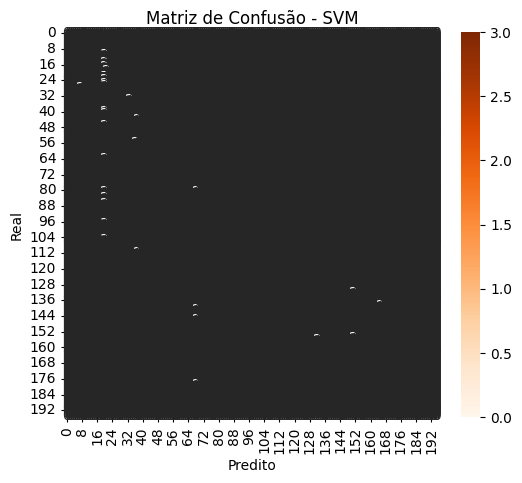

Relatório de Classificação - SVM:

              precision    recall  f1-score   support

          72       0.00      0.00      0.00         1
          75       0.00      0.00      0.00         1
          79       0.00      0.00      0.00         1
          82       0.00      0.00      0.00         1
          84       0.00      0.00      0.00         2
          85       0.00      0.00      0.00         1
          86       0.00      0.00      0.00         0
          87       0.00      0.00      0.00         2
          88       0.00      0.00      0.00         3
          90       0.00      0.00      0.00         1
          91       0.00      0.00      0.00         1
          92       0.00      0.00      0.00         3
          93       0.00      0.00      0.00         2
          94       0.00      0.00      0.00         2
          95       0.00      0.00      0.00         1
          96       0.00      0.00      0.00         3
          97       0.00      0.00      0.00   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [6]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# 1. Normalizar os dados (SVM é sensível a escala)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Dividir em treino e teste
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 3. Treinar modelo SVM
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train_svm, y_train_svm)

# 4. Fazer previsões
y_pred_svm = svm_model.predict(X_test_svm)

# 5. Matriz de confusão
cm_svm = confusion_matrix(y_test_svm, y_pred_svm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges')
plt.title("Matriz de Confusão - SVM")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

# 6. Relatório de classificação
print("Relatório de Classificação - SVM:\n")
print(classification_report(y_test_svm, y_pred_svm))
